In [322]:
ENV["GKS_ENCODING"] = "utf-8"
using Plots
include("src/ladderDGA_Julia.jl");

Inputs Read. Starting Computation                                          
Calculating bubble:   0.964736 seconds (1.12 M allocations: 61.470 MiB, 6.15% gc time)
Calculating χ and γ in the charge channel: (7, 21)
(14,)


LoadError: DimensionMismatch("first array has length 14 which does not match the length of the second, 21.")
dot(::Array{Float64,1}, ::Array{BigFloat,1}) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/generic.jl:788
(::getfield(Main, Symbol("##7276#7277")){Int64,Int64,Int64,Array{Complex{Float64},1}})() at /home/julian/Hamburg/ladderDGA_Julia/src/GFFit.jl:93
setprecision(::getfield(Main, Symbol("##7276#7277")){Int64,Int64,Int64,Array{Complex{Float64},1}}, ::Type{BigFloat}, ::Int64) at ./mpfr.jl:941
setprecision at ./mpfr.jl:947 [inlined]
#fit_νsum#7275 at /home/julian/Hamburg/ladderDGA_Julia/src/GFFit.jl:88 [inlined]
(::getfield(Main, Symbol("#kw##fit_νsum")))(::NamedTuple{(:W,),Tuple{Array{BigFloat,2}}}, ::typeof(fit_νsum), ::Int64, ::Int64, ::Int64, ::Array{Complex{Float64},1}) at ./none:0
#fit_ν_sum#7278(::Array{BigFloat,2}, ::Int64, ::Int64, ::typeof(fit_ν_sum), ::Array{Complex{Float64},2}, ::Int64, ::ModelParameters, ::SimulationParameters, ::Array{Int64,1}) at ./util.jl:156
#fit_ν_sum at ./none:0 [inlined]
#approx_full_sum#7279(::Array{BigFloat,2}, ::Int64, ::Int64, ::typeof(approx_full_sum), ::Array{Complex{Float64},2}, ::Int64, ::ModelParameters, ::SimulationParameters, ::Array{Int64,1}) at /home/julian/Hamburg/ladderDGA_Julia/src/GFFit.jl:128
(::getfield(Main, Symbol("#kw##approx_full_sum")))(::NamedTuple{(:W,),Tuple{Array{BigFloat,2}}}, ::typeof(approx_full_sum), ::Array{Complex{Float64},2}, ::Int64, ::ModelParameters, ::SimulationParameters, ::Array{Int64,1}) at ./none:0
(::getfield(Main, Symbol("##7264#7265")){Array{Complex{Float64},3},Array{Complex{Float64},3},Float64,Float64,SimulationParameters,Int64,Int64,SharedArray{Complex{Float64},3},SharedArray{Complex{Float64},2}})(::UnitRange{Int64}, ::Int64, ::Int64) at /home/julian/Hamburg/ladderDGA_Julia/src/ladderDGATools.jl:63
#168 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Distributed/src/macros.jl:43 [inlined]
run_work_thunk(::getfield(Distributed, Symbol("##168#170")){UnitRange{Int64},getfield(Main, Symbol("##7264#7265")){Array{Complex{Float64},3},Array{Complex{Float64},3},Float64,Float64,SimulationParameters,Int64,Int64,SharedArray{Complex{Float64},3},SharedArray{Complex{Float64},2}},UnitRange{Int64}}, ::Bool) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Distributed/src/process_messages.jl:79
run_work_thunk at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Distributed/src/process_messages.jl:88 [inlined]
(::getfield(Distributed, Symbol("##102#104")){Distributed.RemoteValue,getfield(Distributed, Symbol("##168#170")){UnitRange{Int64},getfield(Main, Symbol("##7264#7265")){Array{Complex{Float64},3},Array{Complex{Float64},3},Float64,Float64,SimulationParameters,Int64,Int64,SharedArray{Complex{Float64},3},SharedArray{Complex{Float64},2}},UnitRange{Int64}}})() at ./task.jl:268
wait_ref at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Distributed/src/remotecall.jl:487 [inlined]
call_on_owner at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Distributed/src/remotecall.jl:477 [inlined]
wait(::Future) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Distributed/src/remotecall.jl:500
sync_end(::Array{Any,1}) at ./task.jl:222
(::getfield(Distributed, Symbol("##167#169")){getfield(Main, Symbol("##7264#7265")){Array{Complex{Float64},3},Array{Complex{Float64},3},Float64,Float64,SimulationParameters,Int64,Int64,SharedArray{Complex{Float64},3},SharedArray{Complex{Float64},2}},UnitRange{Int64}})() at ./task.jl:254

In [8]:
include("src/GFFit.jl")
nν_max = 45
sum_bubble, tail_bubble = fit_F_sum(bubble, nν_max, modelParams, simParams, 2);
limit = approx_full_sum(bubble, nν_max, modelParams, simParams, 2);
n_iν = size(bubble,2)
x_arr = 1:nν_max
fitted_bubble1 = real(tail_func_cmplx(x, tail_bubble[1,1,:]));
fitted_bubble2 = real(tail_func_cmplx(x, tail_bubble[6,1,:]));
fitted_bubble3 = real(tail_func_cmplx(x, tail_bubble[6,end,:]));
f1 = Plots.plot(x_arr, real(sum_bubble[1,1,:]), title="iωₙ=-6, q=0", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
println(size(sum_bubble))
#f1 = Plots.plot!(x_arr, fitted_bubble1)
#f1 = Plots.plot!(x_arr, repeat([tail_bubble[1,1,1]], length(x_arr)))
#f1 = Plots.plot!(x_arr, repeat([real(limit[1,1,1])], length(x_arr)))
#f2 = Plots.plot(x_arr, real(sum_bubble[6,1,:]), title="iωₙ=0, q=0", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
#f2 = Plots.plot!(x_arr, fitted_bubble2)
#f2 = Plots.plot!(x_arr, repeat([tail_bubble[6,1,1]], length(x_arr)))
#f3 = Plots.plot(x_arr, real(sum_bubble[6,end,:]), title="iωₙ=0, q=π", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
#f3 = Plots.plot!(x_arr, fitted_bubble3)
#f3 = Plots.plot!(x_arr, repeat([tail_bubble[6,end,1]], length(x_arr)))
#f4 = Plots.plot(x_arr, real(sum_bubble[end,end,:]), title="iωₙ=6, q=π", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
#f4 = Plots.plot!(x_arr, real(tail_func_full(x, tail_bubble[end,end,:])))
#f4 = Plots.plot!(x_arr, repeat([tail_bubble[end,end,1]], length(x_arr)))
#f = plot(f1,f21,f3,f4,layout=(2,2),legend=:none)
display(f1)

UndefVarError: UndefVarError: fit_F_sum not defined

In [69]:
nν_max = 38
sum_bubble, tail_bubble = fit_F_sum(bubble, nν_max, modelParams, simParams, 2);
limit = approx_full_sum(bubble, nν_max, modelParams, simParams, 2);
n_iν = size(bubble,2)
x_arr = iν_array(modelParams.β, n_iν)[1:nν_max]
fitted_bubble1 = real(tail_func_cmplx(x, tail_bubble[1,1,:]));
fitted_bubble2 = real(tail_func_cmplx(x, tail_bubble[6,1,:]));
fitted_bubble3 = real(tail_func_cmplx(x, tail_bubble[6,end,:]));
f1 = Plots.plot(x_arr, real(sum_bubble[1,1,:]), title="iωₙ=-6, q=0", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
f1 = Plots.plot!(x_arr, fitted_bubble1)
f1 = Plots.plot!(x_arr, repeat([tail_bubble[1,1,1]], length(x_arr)))
f1 = Plots.plot!(x_arr, repeat([real(limit[1,1,1])], length(x_arr)))
f2 = Plots.plot(x_arr, real(sum_bubble[6,1,:]), title="iωₙ=0, q=0", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
f2 = Plots.plot!(x_arr, fitted_bubble2)
f2 = Plots.plot!(x_arr, repeat([tail_bubble[6,1,1]], length(x_arr)))
f3 = Plots.plot(x_arr, real(sum_bubble[6,end,:]), title="iωₙ=0, q=π", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
f3 = Plots.plot!(x_arr, fitted_bubble3)
f3 = Plots.plot!(x_arr, repeat([tail_bubble[6,end,1]], length(x_arr)))
f4 = Plots.plot(x_arr, real(sum_bubble[end,end,:]), title="iωₙ=6, q=π", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
f4 = Plots.plot!(x_arr, real(tail_func_full(x, tail_bubble[end,end,:])))
f4 = Plots.plot!(x_arr, repeat([tail_bubble[end,end,1]], length(x_arr)))
f = plot(f1,f2,f3,f4,layout=(2,2),legend=:none)
display(f)

50
-13


BoundsError: BoundsError: attempt to access 50-element Array{Complex{Float64},1} at index [-13:24]

In [70]:
size(bubble)

(13, 50, 36)

In [71]:
nν_max = 42
limit = zeros((size(bubble,1),size(bubble,3),size(bubble,2)-1))
limit2 = zeros((size(bubble,1),size(bubble,3),size(bubble,2)-1))
for nν_max in 1:49
    limit[:,:,nν_max] = real.(approx_full_sum(bubble, nν_max, modelParams, simParams, 2, tail_func_cmplx, 6));
    limit2[:,:,nν_max] = approx_full_sum(bubble, nν_max, modelParams, simParams, 2, tail_func_full, 3);
end
print(size(real(limit[1,1,:])))
f1 = Plots.plot(1:size(bubble,2)-1, real.(limit[1,1,:]), title="iωₙ=-6, q=0", ylabel="Σₙ bubble(q,iωₙ,iνₙ)", xlabel="nν_max", label="complex coeffs")
f1 = Plots.plot!(1:size(bubble,2)-1, real.(limit2[1,1,:]), label="real coeffs")
f2 = Plots.plot(1:size(bubble,2)-1, real.(limit[6,1,:]), title="iωₙ=0, q=0", ylabel="Σₙ bubble(q,iωₙ,iνₙ)", xlabel="nν_max", label="complex coeffs")
f2 = Plots.plot!(1:size(bubble,2)-1, real.(limit2[6,1,:]), label="real coeffs")
f3 = Plots.plot(1:size(bubble,2)-1, real.(limit[6,end,:]), title="iωₙ=0, q=π", ylabel="Σₙ bubble(q,iωₙ,iνₙ)", xlabel="nν_max", label="complex coeffs")
f3 = Plots.plot!(1:size(bubble,2)-1, real.(limit2[6,end,:]), label="real coeffs")
f4 = Plots.plot(1:size(bubble,2)-1, real.(limit[end,end,:]), title="iωₙ=6, q=π", ylabel="Σₙ bubble(q,iωₙ,iνₙ)", xlabel="nν_max", label="complex coeffs")
f4 = Plots.plot!(1:size(bubble,2)-1, real.(limit2[end,end,:]), label="real coeffs")
f = plot(f1,f2,f3,f4,layout=(2,2))
display(f)

MethodError: MethodError: no method matching approx_full_sum(::Array{Complex{Float64},3}, ::Int64, ::ModelParameters, ::SimulationParameters, ::Int64, ::typeof(tail_func_cmplx), ::Int64)
Closest candidates are:
  approx_full_sum(::Any, ::Any, ::Any, ::Any, ::Any; ω_shift, tail_func, n_tail) at /home/julian/Hamburg/ladderDGA_Julia/src/GFFit.jl:56

In [72]:
l = @layout [a{0.6w} b]
wbox = Int((size(tail_bubble,1)-1)/2)
plot((-wbox):wbox, 1:size(tail_bubble,2), (x,y) -> tail_bubble[x+wbox+1,y,1], st = [:surface, :contourf], layout=l, xlabel="w", ylabel="q", size=(900,400))

UndefVarError: UndefVarError: tail_bubble not defined

## Test analytical lsq fit

TODO: check for $\nu_n + \omega_n$ shift

In orderto minimize $\text{LSQ}(g_n) = \sum_{j=\nu\text{max}_\text{min}}^{\nu\text{max}_\text{max}} \left(f(j) - \left(g_{n}\right)_j\right)^2$
with the tail function 
$f(j) = \sum_{k=0}^{\text{ncoeff}} \frac{c_k}{i^k}$ and data $g_j$
, we first construct 
$M_{kl} = \sum_{j=\nu\text{max}_\text{min}}^{\nu\text{max}_\text{max}} \frac{1}{j^k j^l}$
(derivation: minimize least squares sum analytically) and then for the $n$-th set of $j$ datapoints $\left(g_{n}\right)_j$:
$\left(b_{n}\right)_{l} = \sum_{j=\nu\text{max}_\text{min}}^{\nu\text{max}_\text{max}} \frac{\left(g_{n}\right)_j}{j^l}$

We can then obtain the fit-coefficients $c_n$ of the $n$-th data point by solving $M c_n = b_n$

In [318]:
function build_design_matrix(imin, imax, ncoeffs)
     M = zeros(BigFloat, (ncoeffs, ncoeffs))
     for i = imin:imax, k = 0:(ncoeffs-1), l in 0:(ncoeffs-1)
       M[l+1,k+1] += 1.0 / ((BigFloat(i)^(k+l)))
     end
     return M
end
 
function build_rhs(imin, imax, ncoeffs, data)
     b = zeros(BigFloat, ncoeffs)
     for l in 0:(ncoeffs-1)
          for (ji,j) in enumerate(imin:imax)
              b[l+1] += real(data[ji]) / (BigFloat(j)^(l))
          end
     end
     return b
end

function build_weights(imin, imax, ncoeffs)
    M = build_design_matrix(imin, imax, ncoeffs)
    Minv = inv(M)
    w = zeros(BigFloat, (ncoeffs, length(imin:imax)))
    for k=1:ncoeffs, l = 0:(ncoeffs-1), (ii,i) = enumerate(imin:imax)
        w[k,ii] += Minv[k, l+1] / (BigFloat(i)^l)
    end
    return w
end

function fit_νsum(νmax_start, νmax_end, ncoeffs, data; M = nothing, precision = 100000)
     result = zeros((size(data,1), ncoeffs))
     setprecision(precision) do
         M = if M == nothing build_design_matrix(νmax_start, νmax_end, ncoeffs) else M end
         if ndims(data) == 1
              b = build_rhs(νmax_start, νmax_end, ncoeffs, data)
              result[1, :] = Float64.(M \ b, RoundDown)
              else
              b = zeros(BigFloat, ncoeffs)
              for ωi in 1:size(data,1)
                  b = build_rhs!(b, νmax_start, νmax_end, ncoeffs, data[ωi,:])
                  result[ωi, :] = Float64.(M \ b, RoundDown)
              end
         end
     end
     return result
end

function fit_ν_sum(f, νmax_start, modelParams, simParams, dims)
     n_iν   = minimum(size(f)[dims])
     dims   = Tuple(dims)
     νmax_end = Int(n_iν/2)
     ν_cut  = νmax_end - νmax_start

     f_νmax = dropdims(sum_νmax(f, ν_cut+1, dims=dims); dims=dims)/(modelParams.β^length(dims))
     νdim   = ndims(f_νmax) + 1
     for ν_cut_i in (ν_cut):-1:1
         f_νmax = cat(f_νmax, dropdims(sum_νmax(f, ν_cut_i; dims=dims); dims=dims)/(modelParams.β^length(dims)); dims=νdim)
     end
     return f_νmax, 0
 end 


fit_ν_sum (generic function with 1 method)

In [321]:
using LinearAlgebra
νmax_end   = 50
νmax_start = 35
ncoeffs   = 6
tail_ana = zeros(13)

f_νmax,_ = fit_ν_sum(χDMFTch, νmax_start, modelParams, simParams, [2,3])
data = f_νmax
setprecision(10000) do
    w = real.(build_weights(νmax_start, νmax_end, ncoeffs))
    println(size(w))
    println(size(data))
    for wi in 1:13
            tail_ana[wi] += dot(real(data)[wi,:] , w[1,:])
    end
end;

(6, 16)
(13, 16)


In [320]:
tail_ana

13-element Array{Float64,1}:
 0.04023645708534964
 0.04725287066461852
 0.05569769730831745
 0.06564607429199933
 0.07670071766916757
 0.08748044610535496
 0.09646710186021518
 0.08748044610511316
 0.07670071766974818
 0.0656460742919852 
 0.05569769730888991
 0.04725287066481655
 0.04023645708568411

In [254]:
using DelimitedFiles
w_vec = readdlm("w.dat")[:,1];
n_fit = length(w_vec);
chi_asymt = readdlm("chi_asympt")
chi_asymt[:,6] = (chi_asymt[:,2] + chi_asymt[:,4]) / (modelParams.β*modelParams.β);

In [252]:
include("src/GFFit.jl")
arr_ch = χDMFTch
arr_sp = χDMFTsp
νmax_end   = 50
νmax_start = 30
n_coeffs   = 4
sum_χch, tail_χch = fit_ν_sum(χDMFTch, νmax_start, modelParams, simParams, [2,3], ω_shift=0, n_tail=n_coeffs);
#sum_χch2, tail_χch2 = fit_F_sum(arr_ch, nν_max, modelParams, simParams, [2,3], ω_shift=0, tail_func=tail_func_full, n_tail=5);

sum_χsp, tail_χsp = fit_ν_sum(χDMFTsp, νmax_start, modelParams, simParams, [2,3], ω_shift=0, n_tail=n_coeffs);

fit internal
  1.934567 seconds (116.10 k allocations: 227.098 MiB, 3.82% gc time)
fit internal
  1.787079 seconds (30.25 k allocations: 223.075 MiB, 3.54% gc time)


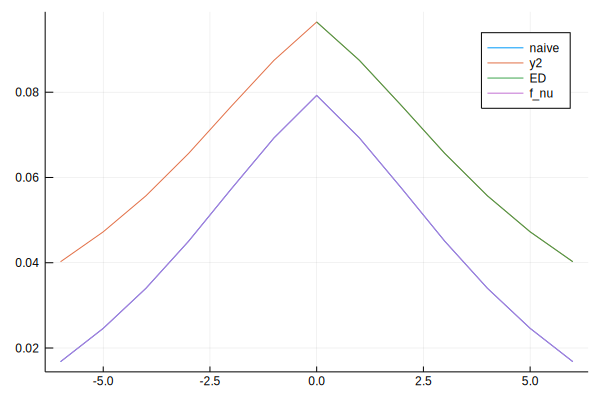

In [308]:
#plot((-6):6,real(tail_χch[:,1]), label="analytic lsq")
plot((-6):6,real(sum_χch[:,end]), label="naive")
plot!((-6):6, tail_ana)
plot!(0:6,chi_asymt[1:7,6], label="ED")
plot!((-6):6, real(f_νmax[:,end]), label="f_nu")
#plot!((-6):6, tail_coeffs[:,1], label="gen. optim")

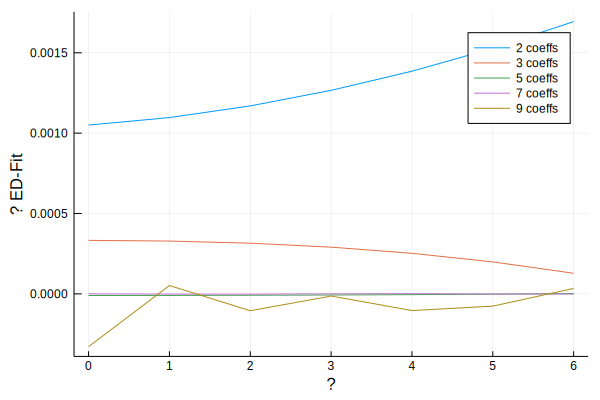

In [177]:
#f = plot(0:6,chi_asymt[1:7,6], label="ED")
f = Plots.plot(0:6,real(a0_analytic[7:end,2]-chi_asymt[1:7,6]), label="2 coeffs", ylabel="Δ ED-Fit", xlabel="ω")
for i = 3:2:10
    f = Plots.plot!(0:6,real(a0_analytic[7:end,i]-chi_asymt[1:7,6]), label="$i coeffs") 
end
display(f)

21:50

In [197]:
tail_2

13×5 Array{Float64,2}:
 0.0401194  -1.09442   -3.9117   15.9043   6.41232e-14
 0.0471645  -1.06055   -3.74776  19.4914   4.12779e-14
 0.0556355  -1.01888   -3.57723  21.9641   2.20687e-14
 0.0656056  -0.968806  -3.41039  23.5459   6.85689e-15
 0.0766766  -0.912274  -3.2575   24.4322  -4.17574e-15
 0.0874671  -0.856493  -3.13318  24.8244  -1.09736e-14
 0.0964579  -0.809447  -3.0507   24.9321  -1.35888e-14
 0.0874671  -0.856493  -3.13318  24.8244  -1.09736e-14
 0.0766766  -0.912274  -3.2575   24.4322  -4.17575e-15
 0.0656056  -0.968806  -3.41039  23.5459   6.85689e-15
 0.0556355  -1.01888   -3.57723  21.9641   2.20687e-14
 0.0471645  -1.06055   -3.74776  19.4914   4.12779e-14
 0.0401194  -1.09442   -3.9117   15.9043   6.41232e-14

In [ ]:
tail_func_full(in_arr, tail_2)

(13, 47)
(47,)


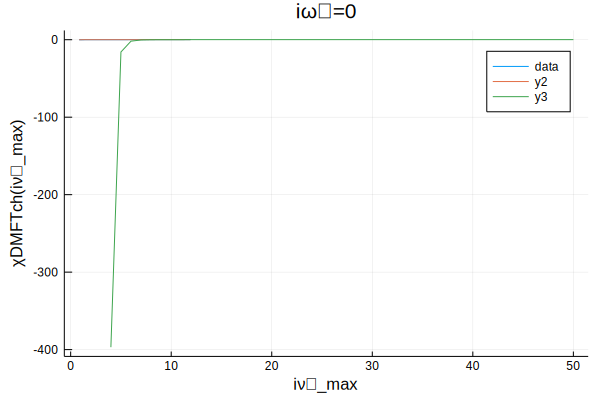

In [148]:
println(size(sum_χch))
println(size(iν_arr))
Plots.plot(imag(iν_arr),real(sum_χch[7,:]), title="iωₙ=0", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max", label="data")
Plots.plot!(imag(iν_arr),real(tail_χch[7,1] .+ tail_χch[7,2] ./ iν_arr .+ tail_χch[7,3] ./ (iν_arr .* iν_arr).+ tail_χch[7,4] ./ (iν_arr .* iν_arr.* iν_arr)))
Plots.plot!(n_arr,real(tail_func_full(iν_arr, tail_2)))

In [138]:
xaxis2(wi) = π .* (2 .* collect(6:(nν_max+6)) .+ 1)/26.1
f21 = Plots.plot(xaxis2(-6), real(sum_χch[1,:]), title="iωₙ=-6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max", label="data")
#f21 = Plots.plot!(xaxis2(-6), real(tail_func_cmplx(xaxis2(-6), tail_χch[1,:])), label="complex fit")
f21 = Plots.plot!(xaxis2(-6), real(tail_func_full(xaxis2(-6), tail_χch[1,:])), label="real fit")
#f21 = Plots.plot!(xaxis2(-6), repeat([tail_χch[1,1]], length(xaxis2(-6))), label="limit complex")
#f21 = Plots.plot!(xaxis2(-6), repeat([tail_χch2[1,1]], length(xaxis2(-6))), label="limit real")
f24 = Plots.plot(xaxis2(6), real(sum_χch[12,:]), title="iωₙ=6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max", label="data")
#f24 = Plots.plot!(xaxis2(0), real(tail_func_cmplx(x, tail_χch[12,:])), label="complex fit")
#f24 = Plots.plot!(xaxis2(0), real(tail_func_full(x, tail_χch2[12,:])), label="real fit")
#f24 = Plots.plot!(xaxis2(6), repeat([tail_χch[12,1]], length(xaxis2(6))), label="limit complex")
#f24 = Plots.plot!(xaxis2(6), repeat([tail_χch2[12,1]], length(xaxis2(6))), label="limit real")
f = plot(f21,f24,layout=(2,1), size=(900,600))
display(f)

BoundsError: BoundsError: attempt to access 3×47 Array{Complex{Float64},2} at index [12, Base.Slice(Base.OneTo(47))]

## Plot for sums over $\nu_n$ at different $\omega_n$

Here one can observe the behavior leading to the bias in the tails.

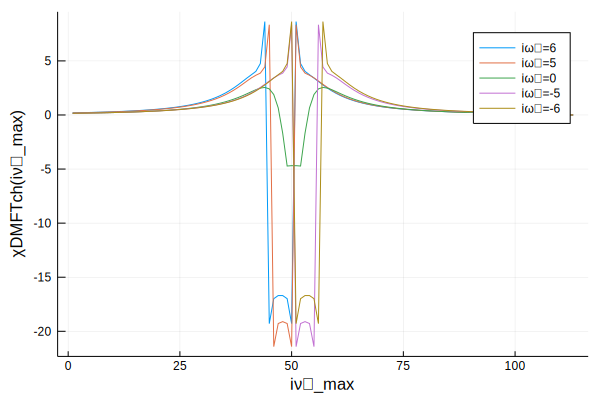

In [139]:
arr_ch_new = zeros(Complex{Float64}, 20,113,113);
for w in 1:size(arr_ch,1)
    arr_ch_new[w, collect(1:100), collect(1:100)] = arr_ch[w,:,:]
end
#.+ (Int(floor(w/2)))
#.+ (Int(floor(w/2)))
w = 6
Plots.plot(collect(1:113),real.(sum(arr_ch_new[w+7,:,:],dims=[2])[:,1]), label="iωₙ=6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = 5
Plots.plot!(collect(1:113),real.(sum(arr_ch_new[w+7,:,:],dims=[2])[:,1]), label="iωₙ=5", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = 0
Plots.plot!(collect(1:113),real.(sum(arr_ch_new[w+7,:,:],dims=[2])[:,1]), label="iωₙ=0", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = -5
Plots.plot!(collect(1:113),real.(sum(arr_ch_new[w+7,:,:],dims=[2])[:,1]), label="iωₙ=-5", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = -6
Plots.plot!(collect(1:113),real.(sum(arr_ch_new[w+7,:,:],dims=[2])[:,1]), label="iωₙ=-6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")

## Plot of shifted sums

Shifting the x axis by $\omega_n$ centers the function.

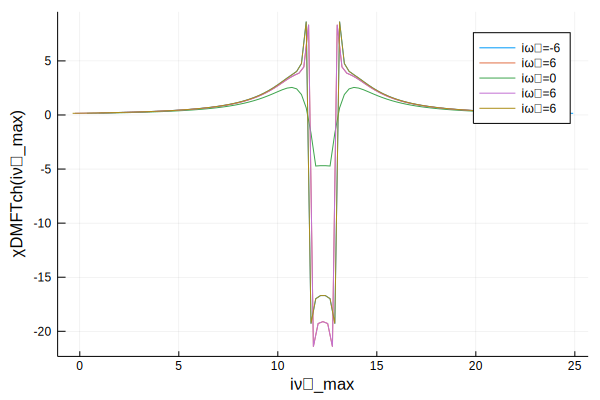

In [140]:
xaxis(wi) = π .* (2 .* collect(1:100) .+ 1 .+ wi)/26.1
w = 6
Plots.plot(xaxis(w), real.(sum(arr_ch[w+7,1:end,:],dims=[2])[:,1,1]), label="iωₙ=-6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = 5
Plots.plot!(xaxis(w), real.(sum(arr_ch[w+7,1:end,:],dims=[2])[:,1,1]), label="iωₙ=6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = 0
Plots.plot!(xaxis(w), real.(sum(arr_ch[w+7,1:end,:],dims=[2])[:,1,1]), label="iωₙ=0", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = -5
Plots.plot!(xaxis(w), real.(sum(arr_ch[w+7,1:end,:],dims=[2])[:,1,1]), label="iωₙ=6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = -6
Plots.plot!(xaxis(w), real.(sum(arr_ch[w+7,1:end,:],dims=[2])[:,1,1]), label="iωₙ=6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")


## Plot of $\chi_\text{DMFT}$ sum

Three different approximations for the sum over all Matsubara frequencies are shown:
    - naive sum (cut off at $\nu$)
    - fit to Taylor series with real coefficients
    - fit to Taylor series with complex coefficients
    
Difference between right and left tail is plotted as a function of $\omega_n$

In [31]:
modelParams.β

26.1

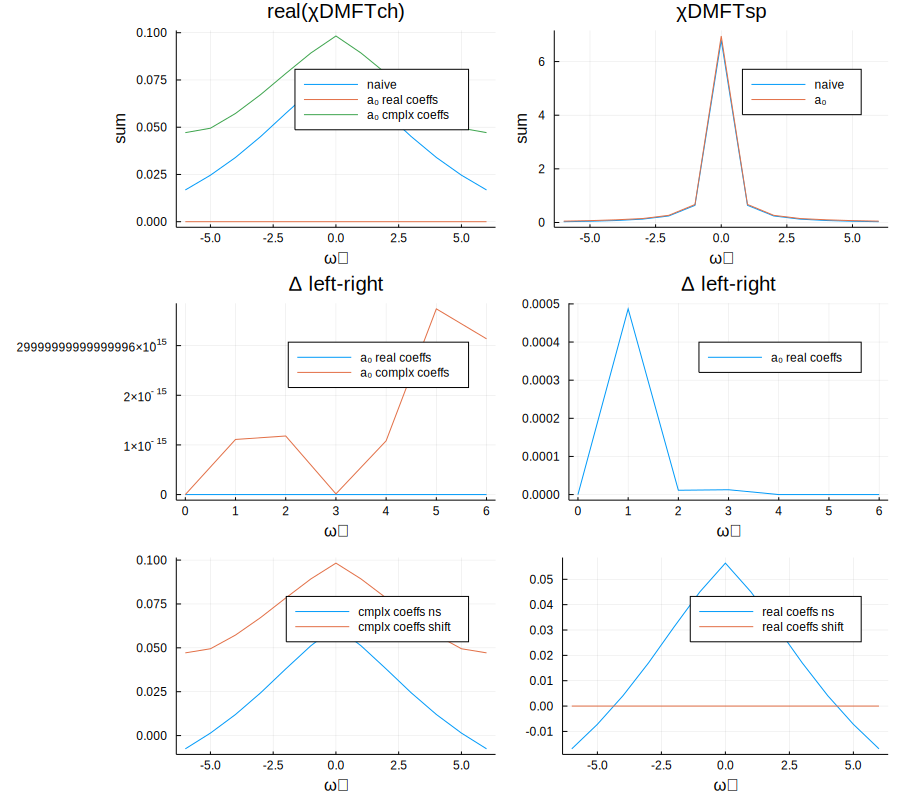

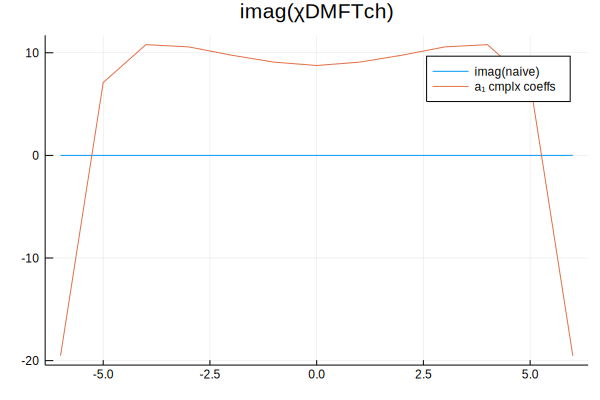

In [235]:
χDMFTch_sum = sum(χDMFTch[:,:,:]; dims=[2,3])[:,1,1]
χDMFTsp_sum = sum(χDMFTsp[:,:,:]; dims=[2,3])[:,1,1]
f1 = plot((-wbox):wbox, real(χDMFTch_sum)/(modelParams.β^2), xlabel="ωₙ", ylabel="sum", label="naive", title="real(χDMFTch)")
f1 = plot!((-wbox):wbox, tail_χch2[:,1], label="a₀ real coeffs")
f1 = plot!((-wbox):wbox, tail_χch[:,1], label="a₀ cmplx coeffs")
f2 = plot((-wbox):wbox, imag(χDMFTch_sum)/(modelParams.β^2), label="imag(naive)", title="imag(χDMFTch)")
f2 = plot!((-wbox):wbox, tail_χch[:,4], label="a₁ cmplx coeffs")
f3 = plot((-wbox):wbox, real(χDMFTsp_sum)/(modelParams.β^2), xlabel="ωₙ", ylabel="sum", label="naive", title="χDMFTsp")
plot!((-wbox):wbox, tail_χsp[:,1], label="a₀")
f4 = plot(0:wbox, abs.(tail_χch2[Int(ceil(size(tail_χch2,1)/2)):end,1].-reverse(tail_χch2[1:Int(ceil(size(tail_χch2,1)/2)),1])), xlabel="ωₙ", title="Δ left-right", label="a₀ real coeffs")
f4 = plot!(0:wbox, abs.(tail_χch[Int(ceil(size(tail_χch,1)/2)):end,1].-reverse(tail_χch[1:Int(ceil(size(tail_χch,1)/2)),1])), xlabel="ωₙ", title="Δ left-right", label="a₀ complx coeffs")
f5 = plot(0:wbox, abs.(tail_χsp[Int(ceil(size(tail_χsp,1)/2)):end,1].-reverse(tail_χsp[1:Int(ceil(size(tail_χsp,1)/2)),1])), xlabel="ωₙ", title="Δ left-right", label="a₀ real coeffs")
f6 = plot((-wbox):wbox, tail_χch_noshift[:,1], xlabel="ωₙ", label="cmplx coeffs ns")
f6 = plot!((-wbox):wbox, tail_χch[:,1], xlabel="ωₙ", label="cmplx coeffs shift")
f9 = plot((-wbox):wbox, tail_χch2_noshift[:,1], xlabel="ωₙ", label="real coeffs ns")
f9 = plot!((-wbox):wbox, tail_χch2[:,1], xlabel="ωₙ", label="real coeffs shift")
f7 = plot((-wbox):wbox, tail_χch2[:,1], xlabel="ωₙ", label="real coeffs shift")
f8 = plot((-wbox):wbox, tail_χch2[:,1], xlabel="ωₙ", label="real coeffs shift")
f = plot(f1,f3,
         f4,f5,
         f6,f9,
    layout=(3,2), size=(900,800))
display(f)

display(f2)

In [127]:
println(real(χDMFTch_sum)/(modelParams.β^2))
println(tail_χch2[:,1])

[0.016794136128359824, 0.024610786724945224, 0.03400287258407843, 0.04505379666079492, 0.05732359862465313, 0.06928247215601628, 0.07924800874884425, 0.06928247215601638, 0.0573235986246529, 0.045053796660794725, 0.03400287258407826, 0.02461078672494532, 0.01679413612835987]
[0.1044919124812141, 0.10238583077488397, 0.10508823949472243, 0.11025776966182761, 0.11705601902766087, 0.12423325512344557, 0.13047248489493624, 0.12423325512344556, 0.11705601902766086, 0.11025776966182758, 0.10508823949472253, 0.10238583077488404, 0.10449191248121416]


In [163]:
println(real(χDMFTch_sum)/(modelParams.β^2))
println(tail_χch2[:,1])

[0.016794136128359824, 0.024610786724945224, 0.03400287258407843, 0.04505379666079492, 0.05732359862465313, 0.06928247215601628, 0.07924800874884425, 0.06928247215601638, 0.0573235986246529, 0.045053796660794725, 0.03400287258407826, 0.02461078672494532, 0.01679413612835987]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [83]:
test = randn((20,20))

s = 0
function t1(f)
    for i in 1:100
        for j in 1:100
            s += f(i,j)
        end
    end
    return s
end

function t2(f)
    for i in 1:100
        for j in 1:100
            s += f(i,j)
        end
    end
    return s
end

t2 (generic function with 1 method)

In [20]:
test = randn((10,10))
println(sum_limits(test, 1, 5))
println(sum_inner(test, 4))

11.502323462946475
2.011610613798547


In [39]:
size(χDMFTch)

(13, 100, 100)

In [65]:
nm = 45

s = zeros(Complex{Float64}, nm, (size(χDMFTch,1)))
for i in nm:-1:1
    s[nm-i+1,:] = sum(χDMFTch[:, i:(end-i+1), i:(end-i+1)], dims=[2,3])
end